In [10]:
%matplotlib inline

In [11]:
from __future__ import unicode_literals, print_function, division
import os
from utils import findFiles, readLines

In [12]:
# Grab Dataset Filepaths
cities_train_file_paths = findFiles('datasets/data_RNN/cities_train/train/*.txt')
cities_val_file_paths = findFiles('datasets/data_RNN/cities_val/val/*.txt')
print(cities_train_file_paths)
print(cities_val_file_paths)

['datasets/data_RNN/cities_train/train\\af.txt', 'datasets/data_RNN/cities_train/train\\cn.txt', 'datasets/data_RNN/cities_train/train\\de.txt', 'datasets/data_RNN/cities_train/train\\fi.txt', 'datasets/data_RNN/cities_train/train\\fr.txt', 'datasets/data_RNN/cities_train/train\\in.txt', 'datasets/data_RNN/cities_train/train\\ir.txt', 'datasets/data_RNN/cities_train/train\\pk.txt', 'datasets/data_RNN/cities_train/train\\za.txt']
['datasets/data_RNN/cities_val/val\\af.txt', 'datasets/data_RNN/cities_val/val\\cn.txt', 'datasets/data_RNN/cities_val/val\\de.txt', 'datasets/data_RNN/cities_val/val\\fi.txt', 'datasets/data_RNN/cities_val/val\\fr.txt', 'datasets/data_RNN/cities_val/val\\in.txt', 'datasets/data_RNN/cities_val/val\\ir.txt', 'datasets/data_RNN/cities_val/val\\pk.txt', 'datasets/data_RNN/cities_val/val\\za.txt']


In [13]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

print(all_letters)
print(n_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
57


In [14]:

# Build the category_lines dictionary, a list of names per language
category_lines = {}

val_category_lines = {}

for filename in cities_train_file_paths:
    category = os.path.splitext(os.path.basename(filename))[0]
    lines = readLines(filename)
    category_lines[category] = lines
    
for filename in cities_val_file_paths:
    category = os.path.splitext(os.path.basename(filename))[0]
    lines = readLines(filename)
    val_category_lines[category] = lines

all_categories = list(category_lines.keys())
val_all_categories = list(val_category_lines.keys())

n_categories = len(all_categories)
val_n_categories = len(val_all_categories)

print(all_categories)
print("Sample of 'af': ", category_lines['af'][:5])
print(n_categories)
print()

print(val_all_categories)
print("Sample of 'af': ", val_category_lines['af'][:5])
print(val_n_categories)


['af', 'cn', 'de', 'fi', 'fr', 'in', 'ir', 'pk', 'za']
Sample of 'af':  ['garavshakh', 'kalishli', 'sarban kelay', 'dahane surunah', 'jahannum']
9

['af', 'cn', 'de', 'fi', 'fr', 'in', 'ir', 'pk', 'za']
Sample of 'af':  ['sikhtopa', 'laferronay', 'cham ghafur', 'souk tafetecht', 'panqash']
9


In [15]:
from utils import letterToTensor, lineToTensor

print(letterToTensor('J'))
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [16]:
from utils.CharRNNClassify import CharRNNClassify
models = [
    # Model                                         Learning Rate
    (CharRNNClassify(n_letters, 128, n_categories),     0.002),
    (CharRNNClassify(n_letters, 128, n_categories),     0.0015),
    (CharRNNClassify(n_letters, 128, n_categories),     0.001),
    (CharRNNClassify(n_letters, 64, n_categories),      0.002),
    (CharRNNClassify(n_letters, 256, n_categories),     0.002)
]


In [17]:

n_epochs = 100000
print_every = 5000
plot_every = 1000

save_dir = os.path.abspath('Models/')

In [18]:
from utils import randomTrainingPair

# Create Validation sets
x_val = []
y_true = []

for _ in range(850):
    category, _, _, line_tensor = randomTrainingPair(x=val_category_lines, y=val_all_categories)
    x_val.append(line_tensor)
    y_true.append(category)

Epochs: 5000 | Complete: 5% | Time: (0m 23s) | Loss: 2.2033 | Val Accuracy: 27.29%
Epochs: 10000 | Complete: 10% | Time: (0m 46s) | Loss: 1.9175 | Val Accuracy: 28.59%
Epochs: 15000 | Complete: 15% | Time: (1m 10s) | Loss: 1.8678 | Val Accuracy: 30.12%
Epochs: 20000 | Complete: 20% | Time: (1m 35s) | Loss: 2.4085 | Val Accuracy: 33.65%
Epochs: 25000 | Complete: 25% | Time: (1m 58s) | Loss: 1.9898 | Val Accuracy: 40.12%
Epochs: 30000 | Complete: 30% | Time: (2m 21s) | Loss: 1.2941 | Val Accuracy: 39.53%
Epochs: 35000 | Complete: 35% | Time: (2m 44s) | Loss: 1.1789 | Val Accuracy: 42.59%
Epochs: 40000 | Complete: 40% | Time: (3m 7s) | Loss: 0.5390 | Val Accuracy: 45.18%
Epochs: 45000 | Complete: 45% | Time: (3m 30s) | Loss: 1.0460 | Val Accuracy: 49.53%
Epochs: 50000 | Complete: 50% | Time: (3m 54s) | Loss: 2.2400 | Val Accuracy: 46.94%
Epochs: 55000 | Complete: 55% | Time: (4m 17s) | Loss: 2.1905 | Val Accuracy: 49.41%
Epochs: 60000 | Complete: 60% | Time: (4m 40s) | Loss: 1.8725 | Val 

c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + y, rotation=90)
c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + y)


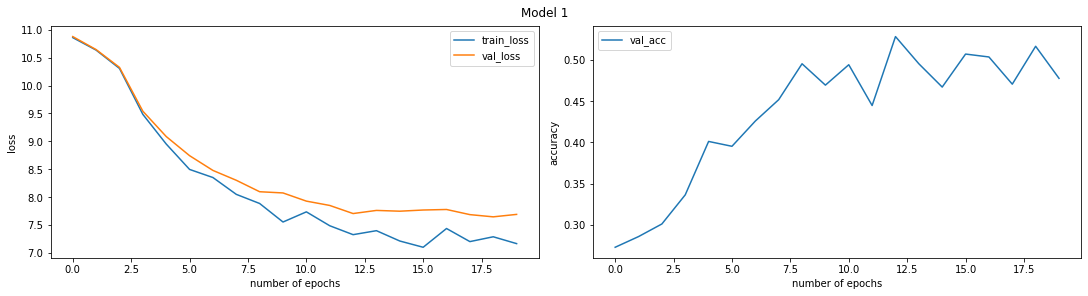

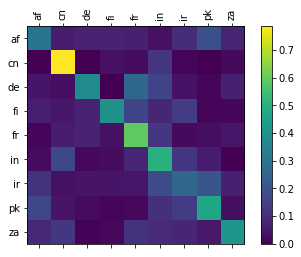

Epochs: 5000 | Complete: 5% | Time: (0m 23s) | Loss: 2.1580 | Val Accuracy: 26.82%
Epochs: 10000 | Complete: 10% | Time: (0m 47s) | Loss: 2.2582 | Val Accuracy: 25.06%
Epochs: 15000 | Complete: 15% | Time: (1m 11s) | Loss: 2.0462 | Val Accuracy: 27.88%
Epochs: 20000 | Complete: 20% | Time: (1m 35s) | Loss: 1.8376 | Val Accuracy: 33.18%
Epochs: 25000 | Complete: 25% | Time: (1m 58s) | Loss: 1.4788 | Val Accuracy: 30.24%
Epochs: 30000 | Complete: 30% | Time: (2m 22s) | Loss: 2.1861 | Val Accuracy: 34.71%
Epochs: 35000 | Complete: 35% | Time: (2m 47s) | Loss: 0.5080 | Val Accuracy: 40.35%
Epochs: 40000 | Complete: 40% | Time: (3m 11s) | Loss: 1.2207 | Val Accuracy: 35.88%
Epochs: 45000 | Complete: 45% | Time: (3m 34s) | Loss: 1.5524 | Val Accuracy: 40.24%
Epochs: 50000 | Complete: 50% | Time: (3m 57s) | Loss: 2.2973 | Val Accuracy: 42.59%
Epochs: 55000 | Complete: 55% | Time: (4m 21s) | Loss: 1.5124 | Val Accuracy: 47.41%
Epochs: 60000 | Complete: 60% | Time: (4m 44s) | Loss: 1.3606 | Val

c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + y, rotation=90)
c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + y)


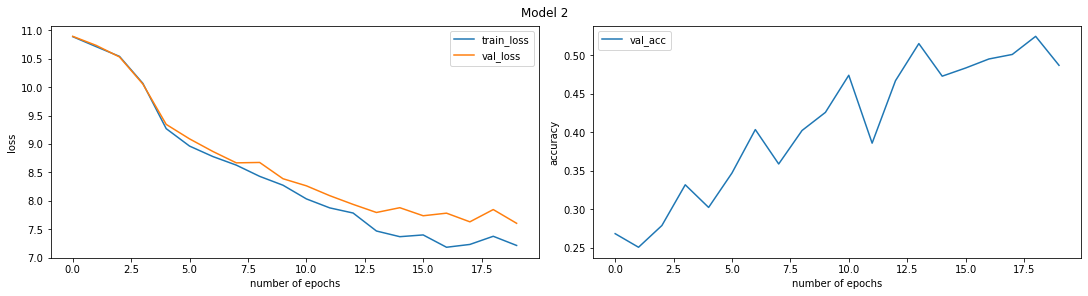

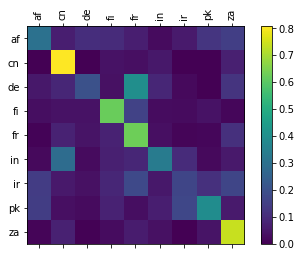

Epochs: 5000 | Complete: 5% | Time: (0m 23s) | Loss: 2.2098 | Val Accuracy: 21.06%
Epochs: 10000 | Complete: 10% | Time: (0m 47s) | Loss: 2.2303 | Val Accuracy: 26.59%
Epochs: 15000 | Complete: 15% | Time: (1m 10s) | Loss: 2.3325 | Val Accuracy: 27.18%
Epochs: 20000 | Complete: 20% | Time: (1m 34s) | Loss: 1.8282 | Val Accuracy: 30.47%
Epochs: 25000 | Complete: 25% | Time: (1m 59s) | Loss: 2.0912 | Val Accuracy: 30.00%
Epochs: 30000 | Complete: 30% | Time: (2m 23s) | Loss: 2.0873 | Val Accuracy: 33.53%
Epochs: 35000 | Complete: 35% | Time: (2m 46s) | Loss: 1.0804 | Val Accuracy: 37.06%
Epochs: 40000 | Complete: 40% | Time: (3m 10s) | Loss: 2.3588 | Val Accuracy: 38.00%
Epochs: 45000 | Complete: 45% | Time: (3m 33s) | Loss: 1.4728 | Val Accuracy: 37.88%
Epochs: 50000 | Complete: 50% | Time: (3m 57s) | Loss: 1.1942 | Val Accuracy: 44.47%
Epochs: 55000 | Complete: 55% | Time: (4m 21s) | Loss: 1.4438 | Val Accuracy: 43.06%
Epochs: 60000 | Complete: 60% | Time: (4m 45s) | Loss: 0.5532 | Val

c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + y, rotation=90)
c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + y)


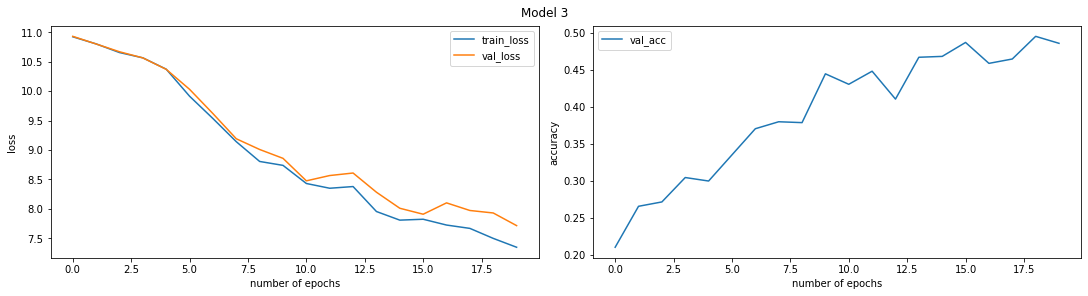

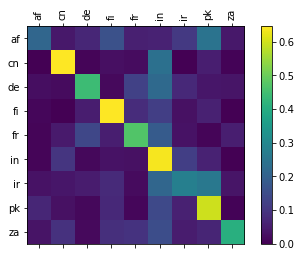

Epochs: 5000 | Complete: 5% | Time: (0m 15s) | Loss: 2.0906 | Val Accuracy: 23.88%
Epochs: 10000 | Complete: 10% | Time: (0m 30s) | Loss: 2.0584 | Val Accuracy: 29.88%
Epochs: 15000 | Complete: 15% | Time: (0m 45s) | Loss: 2.1984 | Val Accuracy: 30.24%
Epochs: 20000 | Complete: 20% | Time: (1m 0s) | Loss: 1.8413 | Val Accuracy: 34.71%
Epochs: 25000 | Complete: 25% | Time: (1m 16s) | Loss: 1.0466 | Val Accuracy: 33.41%
Epochs: 30000 | Complete: 30% | Time: (1m 31s) | Loss: 2.1198 | Val Accuracy: 33.06%
Epochs: 35000 | Complete: 35% | Time: (1m 46s) | Loss: 1.7716 | Val Accuracy: 36.71%
Epochs: 40000 | Complete: 40% | Time: (2m 1s) | Loss: 1.7353 | Val Accuracy: 44.71%
Epochs: 45000 | Complete: 45% | Time: (2m 16s) | Loss: 0.8802 | Val Accuracy: 42.59%
Epochs: 50000 | Complete: 50% | Time: (2m 31s) | Loss: 1.6610 | Val Accuracy: 43.06%
Epochs: 55000 | Complete: 55% | Time: (2m 46s) | Loss: 0.7412 | Val Accuracy: 40.12%
Epochs: 60000 | Complete: 60% | Time: (3m 1s) | Loss: 1.8950 | Val Ac

c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + y, rotation=90)
c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + y)


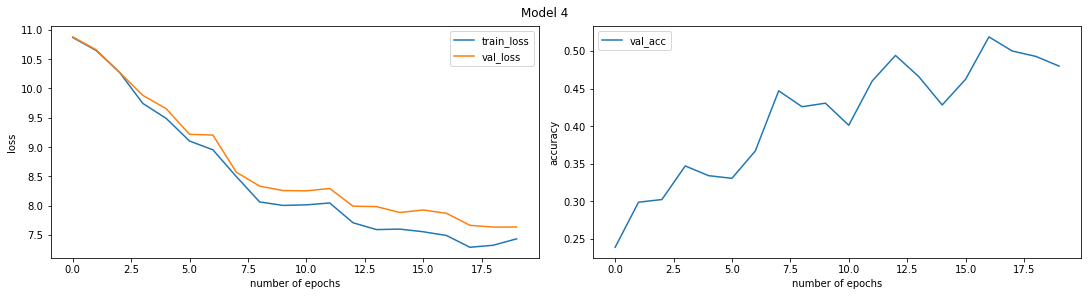

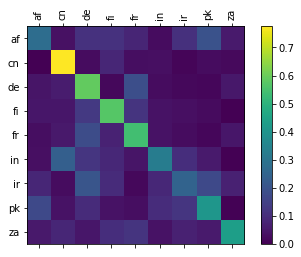

Epochs: 5000 | Complete: 5% | Time: (0m 26s) | Loss: 2.2579 | Val Accuracy: 23.88%
Epochs: 10000 | Complete: 10% | Time: (0m 52s) | Loss: 2.3764 | Val Accuracy: 31.18%
Epochs: 15000 | Complete: 15% | Time: (1m 18s) | Loss: 1.7167 | Val Accuracy: 31.65%
Epochs: 20000 | Complete: 20% | Time: (1m 44s) | Loss: 1.7563 | Val Accuracy: 33.18%
Epochs: 25000 | Complete: 25% | Time: (2m 9s) | Loss: 1.5666 | Val Accuracy: 38.82%
Epochs: 30000 | Complete: 30% | Time: (2m 35s) | Loss: 1.1564 | Val Accuracy: 42.82%
Epochs: 35000 | Complete: 35% | Time: (3m 1s) | Loss: 1.7625 | Val Accuracy: 39.65%
Epochs: 40000 | Complete: 40% | Time: (3m 29s) | Loss: 1.4047 | Val Accuracy: 44.94%
Epochs: 45000 | Complete: 45% | Time: (3m 54s) | Loss: 1.9825 | Val Accuracy: 49.88%
Epochs: 50000 | Complete: 50% | Time: (4m 19s) | Loss: 0.7452 | Val Accuracy: 43.41%
Epochs: 55000 | Complete: 55% | Time: (4m 45s) | Loss: 3.3169 | Val Accuracy: 46.82%
Epochs: 60000 | Complete: 60% | Time: (5m 11s) | Loss: 2.7850 | Val A

c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + y, rotation=90)
c:\Users\tarek\OneDrive\Documents\Developer\COMP4207\Programming_A2\Part2\utils\helpers.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + y)


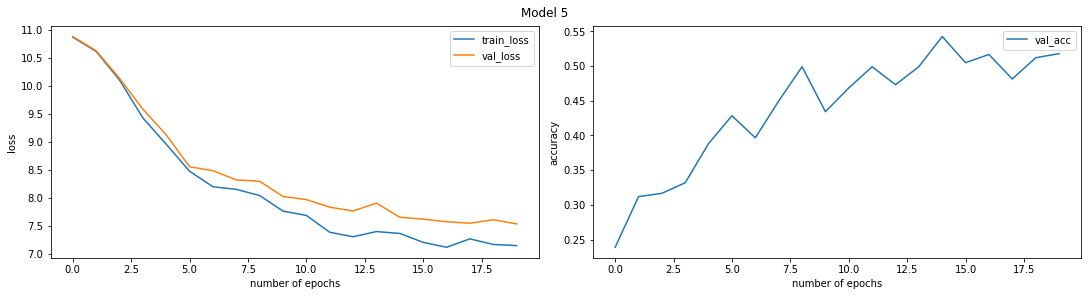

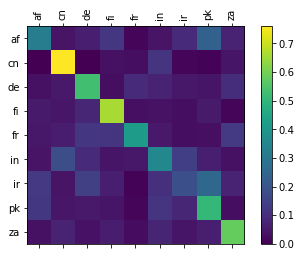

In [19]:
import time
from utils import timeSince, trainOneEpoch, lossEvaluate
from utils import confusionMatrix, calculateAccuracy
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch.nn as nn


# Iterate over each Model
for i in range(len(models)):

    criterion = nn.NLLLoss()

    model, lr = models[i]

    val_accuracy = []

    # Keep track of losses for plotting
    training_losses = []
    val_losses = []

    current_loss = 0
    val_current_loss = 0

    start = time.time() # Start Training Timer

    # Train the model
    for epoch in range(1, n_epochs + 1):
        category, line, category_tensor, line_tensor = randomTrainingPair(x=category_lines, y=all_categories)
        output, loss = trainOneEpoch(model, x=line_tensor, y=category_tensor, lr=lr, criterion=criterion)
        current_loss += loss

        val_category, val_line, val_category_tensor, val_line_tensor = randomTrainingPair(x=val_category_lines, y=val_all_categories)
        val_loss = lossEvaluate(model, val_category_tensor, val_line_tensor, criterion)
        val_current_loss += val_loss



        # Print epoch number, Percentage Complete, Time, Training Loss, Training Accuracy
        if epoch % print_every == 0:

            val_acc = calculateAccuracy(model,x=x_val, y=y_true)
            val_accuracy.append(val_acc)

            print('Epochs: %d | Complete: %d%% | Time: (%s) | Loss: %.4f | Val Accuracy: %.2f%%' % \
            (epoch, (epoch / n_epochs) * 100, timeSince(start), loss, val_acc * 100))


            # Add current loss avg to list of losses
            training_losses.append(current_loss / plot_every)
            current_loss = 0

            val_losses.append(val_current_loss / plot_every)
            val_current_loss = 0

    

    plt.figure(figsize=(15,4), constrained_layout=True)
    plt.tight_layout(pad=20)
    plt.subplot(1, 2, 1)
    plt.plot(training_losses, label="train_loss")
    plt.plot(val_losses, label='val_loss')
    plt.xlabel("number of epochs")
    plt.ylabel("loss")
    plt.legend()
        
    plt.subplot(1, 2, 2)
    plt.plot(val_accuracy, label='val_acc')
    plt.legend()
    plt.xlabel("number of epochs")
    plt.ylabel("accuracy")
    plt.suptitle(f"Model {i + 1}")
    plt.savefig(os.path.join(save_dir, f"/training_history_{i + 1}.png"))

    torch.save(model.state_dict(), os.path.join(save_dir, f'model_{i + 1}.pt'))

    confusionMatrix(model, val_category_lines, val_all_categories)

